##Categoría.

Aprendizaje no supervisado.

#Analísis de componentes principales PCA (Jolliffe, 2010) Pág 64.

**Objetivo:** Reducir la dimensionalidad de un dataset formado por numerosas variables interrelacionadas, manteniendo tanto como sea posible la varianza presente en el dataset.


Puede ser considerado modelo más que un sólo algoritmo (es ampliamente aplicable), es una herramienta que nos permite ver de un conjunto de variables cuales son aquellas que tienen máxima varianza y las ordena de mayor a menor. 

*Entre mayor sea la varianza mejor podrémos hacer proyecciones sobre esa variable o eje.*

También este modelo nos permite cuantificar que tan buena es una proyección de un espacio a otra de menor dimensión (10 dimensiones a 3 dimensiones). Es un conjunto de numeros que muestran las variables más relevantes y las ordena.
Si tomamos las últimas componentes (menos relevantes) nos sirve para detectar outliers *valores atípicos*. 

Se usa aquí el método del cálculo de eigenvectores y eigenvalores de la **matriz de covarianzas**. 
####Variables interrelacionadas.
Si guardan correlación un par de variables tal que Correlación = 1 y Magnitud = (->,->) ó -1 (->,<-) estas son descartables para representar nuestras identidades, *podemos decidir entre una u otra*. 

Carecterizando con 2 medidas el siguiente dataset
(imagen plano cartesiano)
**PCA encontrará la dirección de máxima varianza** (aquí la diagonal) Si rotamos el dataset de manera que quede sobre la horizontal, reducimos la caracteriación o rasgos del dataset de 2 dimensiones a 1. Si hay un grupo de datos que caen sobre el mismo punto en la recta se **pierde la información**, esto es usual y se busca estar a un porcentaje de **tolerancia** de información para usarce como **aproximación**. 

##La maldición de la dimensionalidad.
Cuando la dimensionalidad incrementa, el volumen del espacio incrementa tan rápido tal que la información disponible se esparce o dispersa. 
Ejemplos: 
* **Singularidad de matrices:** que la matriz crezca tanto que se vuelva singular (por lo que su determinante es cero) y ya no es invertible, pierde muchas propiedades del algebra líneal.
* **Efecto de aniquilación y explosión:** cuando los valores se hacen tan pequeños hasta que numericamente desaparecen (potencias con datos normalizados. i.e. $x^n|x\in(0,1)$). O que crecen tan rápido que tienden a infinito incluso con valores pequeños. i.e. $1.2$ 
**Distribución de baja redundancia:** La varianza en cualquiera de las direcciones es aproximadamente la misma. i.e. un dataset distribuido en un circulo. estilo de simetría.  
**Distribución de alta redundancia:** El caso de una distribución sobre una linea recta. El método es aplicable en despreciar una dimension después de su proyección.


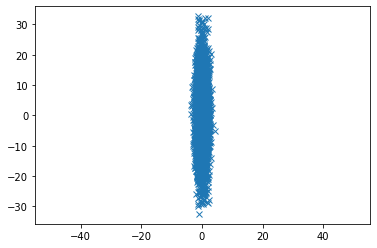

In [ ]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
import matplotlib.pyplot as plt
import numpy as np
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

Si bajamos la varianza de 100 de la segunda variable la distribución es más esférica. Con varianza 100 es más redundante que con varianzas similares.
Nos quedamos con la de mayor varianza por que la proyección es muy fiel, proyecta los puntos sin tanta perdida de información. Al perder dimension no pierde información, es redundante. 

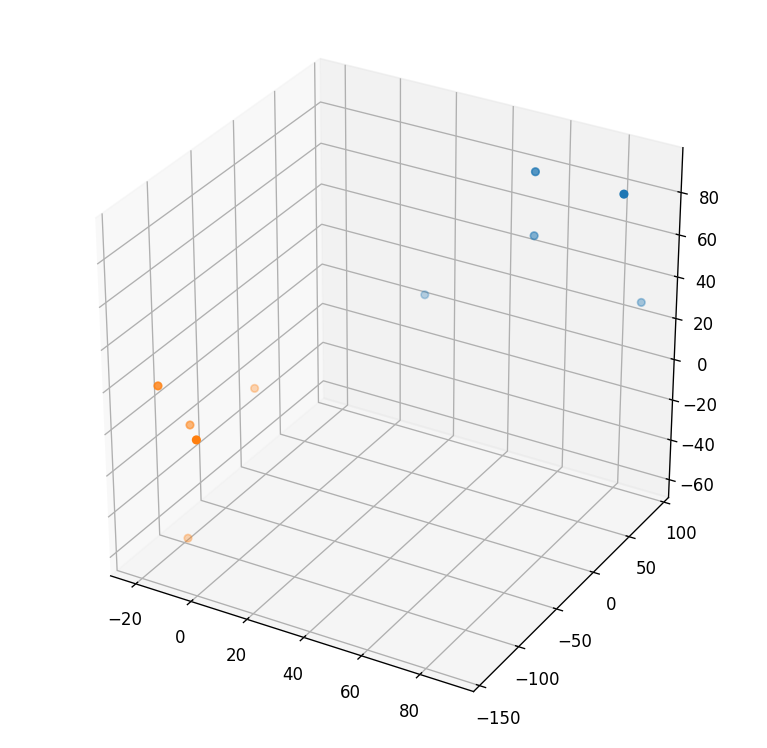

In [ ]:
def ave(array):
  return np.sum(array, axis = 0)/len(array) #row = len(array), col = len(array[0])

def cov(array1, array2, dim, sample_no):
  ave1, ave2 = ave(array1), ave(array2)
  diff = [(array1[i] - ave1)*(array2[i] - ave2) for i in range(sample_no)]  
  return np.sum(diff, axis = 0)/(sample_no) #poblational version

def covM(data, dim, sample_no):
  M = []
  M = [[cov(data[:,i], data[:,j], dim, sample_no) for j in range(dim)] for i in range(dim)]
  return np.asarray(M)

data = np.asarray([[90, 60, 90], 
        [90, 90, 30],
        [60, 60, 60],
        [60, 60, 90],
        [30, 30, 30]])

w, v = np.linalg.eig(covM(data, len(data[0]), len(data))) # col v[:, i] is eigenvector corresp. to w[i] eigenvalue 
newspace = np.matmul(data,v)

fig = plt.figure(figsize = (8, 8), dpi = 120)
ax = plt.axes(projection='3d')
ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
ax.scatter3D(newspace[:, 0], newspace[:, 1], newspace[:, 2])

#Autovalores 

Se dice que $\pmb{a}$ es el autovector del operador $\Omega$ *representable como matriz* con el autovalor $\omega$

$$\Omega\pmb{a} = \omega \pmb{a}\rightarrow (\Omega-\omega I)\pmb a=0,$$

$$e_i (\Omega-\omega I) \sum^n_{j=1}a_j e_j=0,$$

$$\sum^n_{j=1}a_j e_i (\Omega-\omega I) e_j=0,$$

$$\sum^n_{j=1} (\Omega_{ij}-\omega \delta_{ij}) a_j = 0$$

Este es un grupo de ecuaciones lineales homogeneneas *con $v_j$ desconocidas* conocida como la ecuacion característica. Una solución no trivial, en este caso, existe si el determinante del coeficiente matricial se desvanece, i.e.,

$$det(\Omega_{ij} - \omega \delta_{ij}) = 0$$

Claramente, si estamos trabajando en un espacio vectorial n-dimensional, este polinomio es de orden $n$ en $\omega$ y por lo tanto posee $n$ soluciones para $\omega$, que corresponde a todos los autovalores de $\Omega$. Estas raíces no deben ser necesariamente distintas o reales. Sin embargo, una vez que se obtienen los autovalores, los autovectores se derivan de la ecuación característica de forma simple.

Ejercicio.
La implementación de la matriz de covarianzas en excel se obtiene:

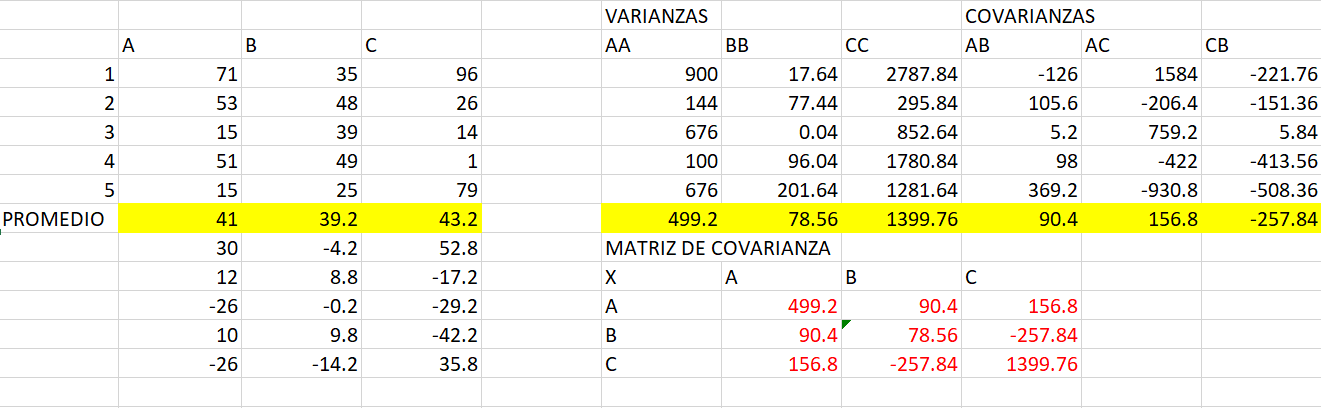

$$\Omega = \begin{bmatrix} 499.2 & 90.4 & 156.8 \\ 90.4 & 78.56 & -257.84 \\ 156.8 & -257.84 & 1399.76 \end{bmatrix}$$

$$\sum^3_{j=1} (\Omega_{ij} - \omega \delta_{ij}) v_j = 0$$
Tendremos una solucion no trivial siendo que el determinante del coeficiente de la matriz se desvanece.
$$det\begin{bmatrix} 499.2-\omega & 90.4 & 156.8 \\ 90.4 & 78.56-\omega & -257.84 \\ 156.8 & -257.84 & 1399.76-\omega \end{bmatrix}=0$$
Se resuelve el polinomio cubico
$$-\omega^3+1977.52\omega^2-748702.624\omega+1026875.751=0$$
Para obtener los autovalores siguientes
$$\omega = 1.37654, 508.1724, 1467.97105$$


In [ ]:
Matrix = np.asarray([[499.2, 90.4, 156.8], 
        [90.4, 78.56, -257.84],
        [156.8, -257.84, 1399.76]])

w, v = np.linalg.eig(Matrix)
w

array([1.46797105e+03, 5.08172405e+02, 1.37654156e+00])

$$\Omega = \begin{bmatrix} 497.8 & 90.4 & 156.8 \\ 90.4 & 77.18 & -257.84 \\ 156.8 & -257.84 & 1398.38 \end{bmatrix}$$

$$\Omega = \begin{bmatrix} -8.9 & 90.4 & 156.8 \\ 90.4 & -429.61 & -257.84 \\ 156.8 & -257.84 & 891.59 \end{bmatrix}$$

$$\Omega = \begin{bmatrix} -968.8 & 90.4 & 156.8 \\ 90.4 & -1389.41 & -257.84 \\ 156.8 & -257.84 & -68.21 \end{bmatrix}$$

In [ ]:
v

array([[-0.14177009, -0.96131831,  0.23615323],
       [ 0.17169236, -0.25882631, -0.9505423 ],
       [-0.97489639,  0.09421277, -0.20174484]])

Para implementar el algoritmo de Análisis de Componentes Principales (PCA) en su versión de vectores propios de la matriz de covarianza de un dataset dado, se requieren algunos conceptos previos de Álgebra Lineal, Cálculo Vectorial y Probabilidad y Estadística. En esta tarea realizará lo siguiente:

1. En una hoja de cálculo de Excel genere una matriz (M) de 5 filas y 3 columnas con números enteros aleatorios entre 1 y 100. (Esto lo vimos en clase y se muestra en archivo Excel adjunto) Hay una imprecisión en las diapositivas, la fórmula para covarianzas incluye la versión muestral, pero la matriz resultante fue calculada con la versión poblacional. La correcta es la versión poblacional por lo cual deberán dividir entre 5 y no entre 4 la sumatoria de las diferencias.

2. Investigue en los libros base o en books.google.com cómo calcular los valores y vectores propios de una matriz pequeña (3x3 o 4x4) y anótela en sus apuntes, puede reescribir ejemplos de libros de texto, en este caso incluya las referencias bibliográficas. Posteriormente, calcule los vectores y valores propios de su matriz de covarianza calculada en el paso 1.

3. Compruebe sus cálculos utilizando los métodos de Python disponibles en el paquete Numpy (Esto lo haremos en clase, pero si alguien tiene tiempo para llegar a este punto puede hacerlo). La tarea se evaluará hasta el punto 2, donde se calcularon los valores y vectores propios de la matriz de covarianzas siguiendo el procedimiento de Álgebra Lineal.

4. Guarde sus ejercicios y cálculos en un archivo PDF con el siguiente nombre ML_Apellidos_Tarea2_eigenvalores.PDF y súbalo a la plataforma